# Projeto de Disciplina de Algoritmos de Inteligência Artificial para Clusterização

### Aluno: Alexandre José Messias de Lara

Github do projeto: https://github.com/thealexandrelara/project-infnet-algoritmos-de-inteligencia-artificial-para-clusterizacao-25E4_2

### 1. Importação de dependências

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster import hierarchy
import numpy as np
from scipy.spatial.distance import cdist

from pathlib import Path

### 2. Dicionário de dados

In [ ]:
data_dict_path = Path.cwd() / "data" / "data-dictionary.csv"
data_dict = pd.read_csv(data_dict_path)

pd.set_option("display.max_colwidth", None)

data_dict


,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


### 3. Análise exploratória dos dados

#### 3.1. Carregamento dos dados

In [3]:
data_path = Path.cwd().parent / "data" / "Country-data.csv"
df = pd.read_csv(data_path)

df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### 3.2. Estatísticas do dataset

In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### 3.3. Resumo do dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### 3.4. Quantos países existem no dataset?

In [6]:
print(f"Existem {df['country'].nunique()} países no dataset.")

Existem 167 países no dataset.


#### 3.5. Visualização das faixas dinâmica das variáveis

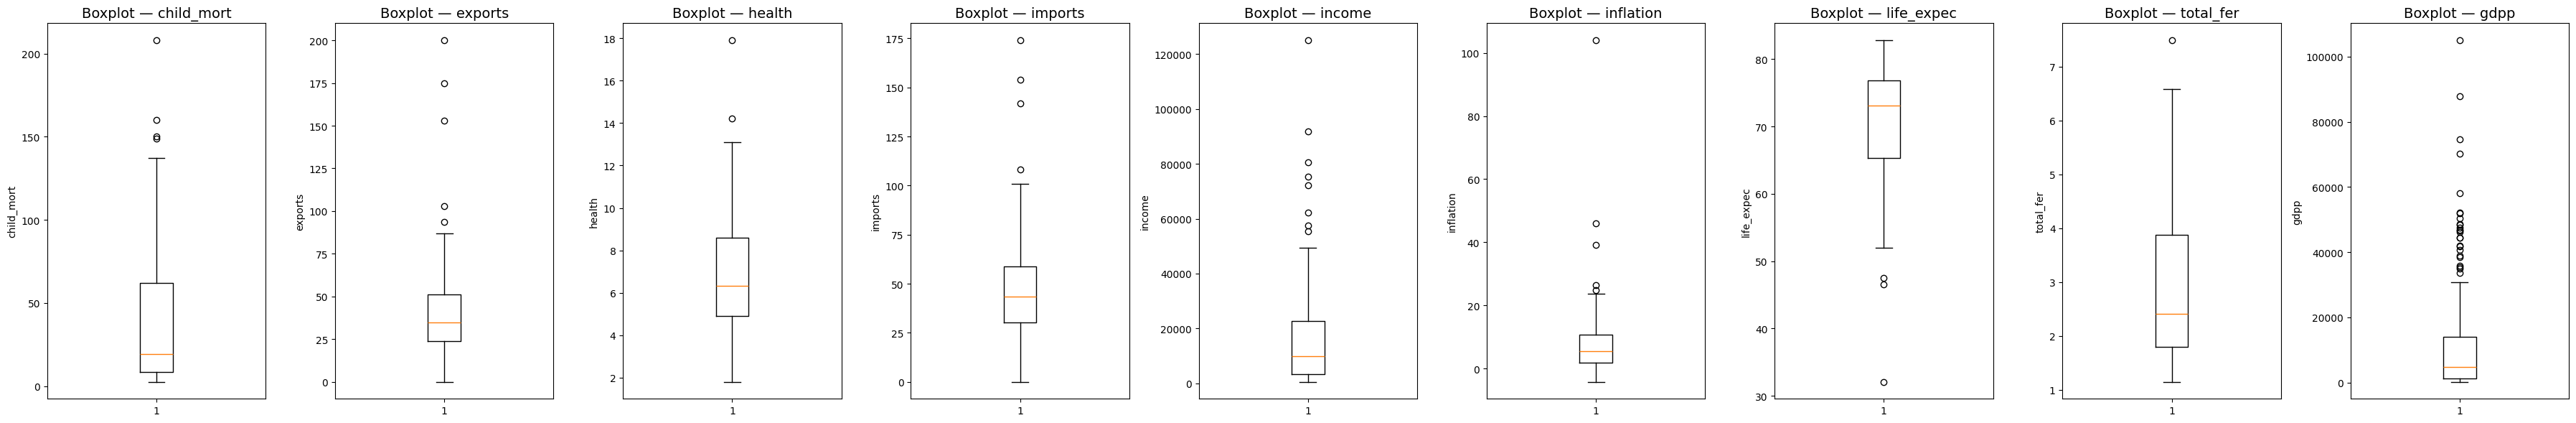

In [7]:
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include='number').columns
n_cols = len(num_cols)

fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 4, 6))

for ax, col in zip(axes, num_cols):
    ax.boxplot(df[col].dropna())
    ax.set_title(f"Boxplot — {col}", fontsize=14)
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

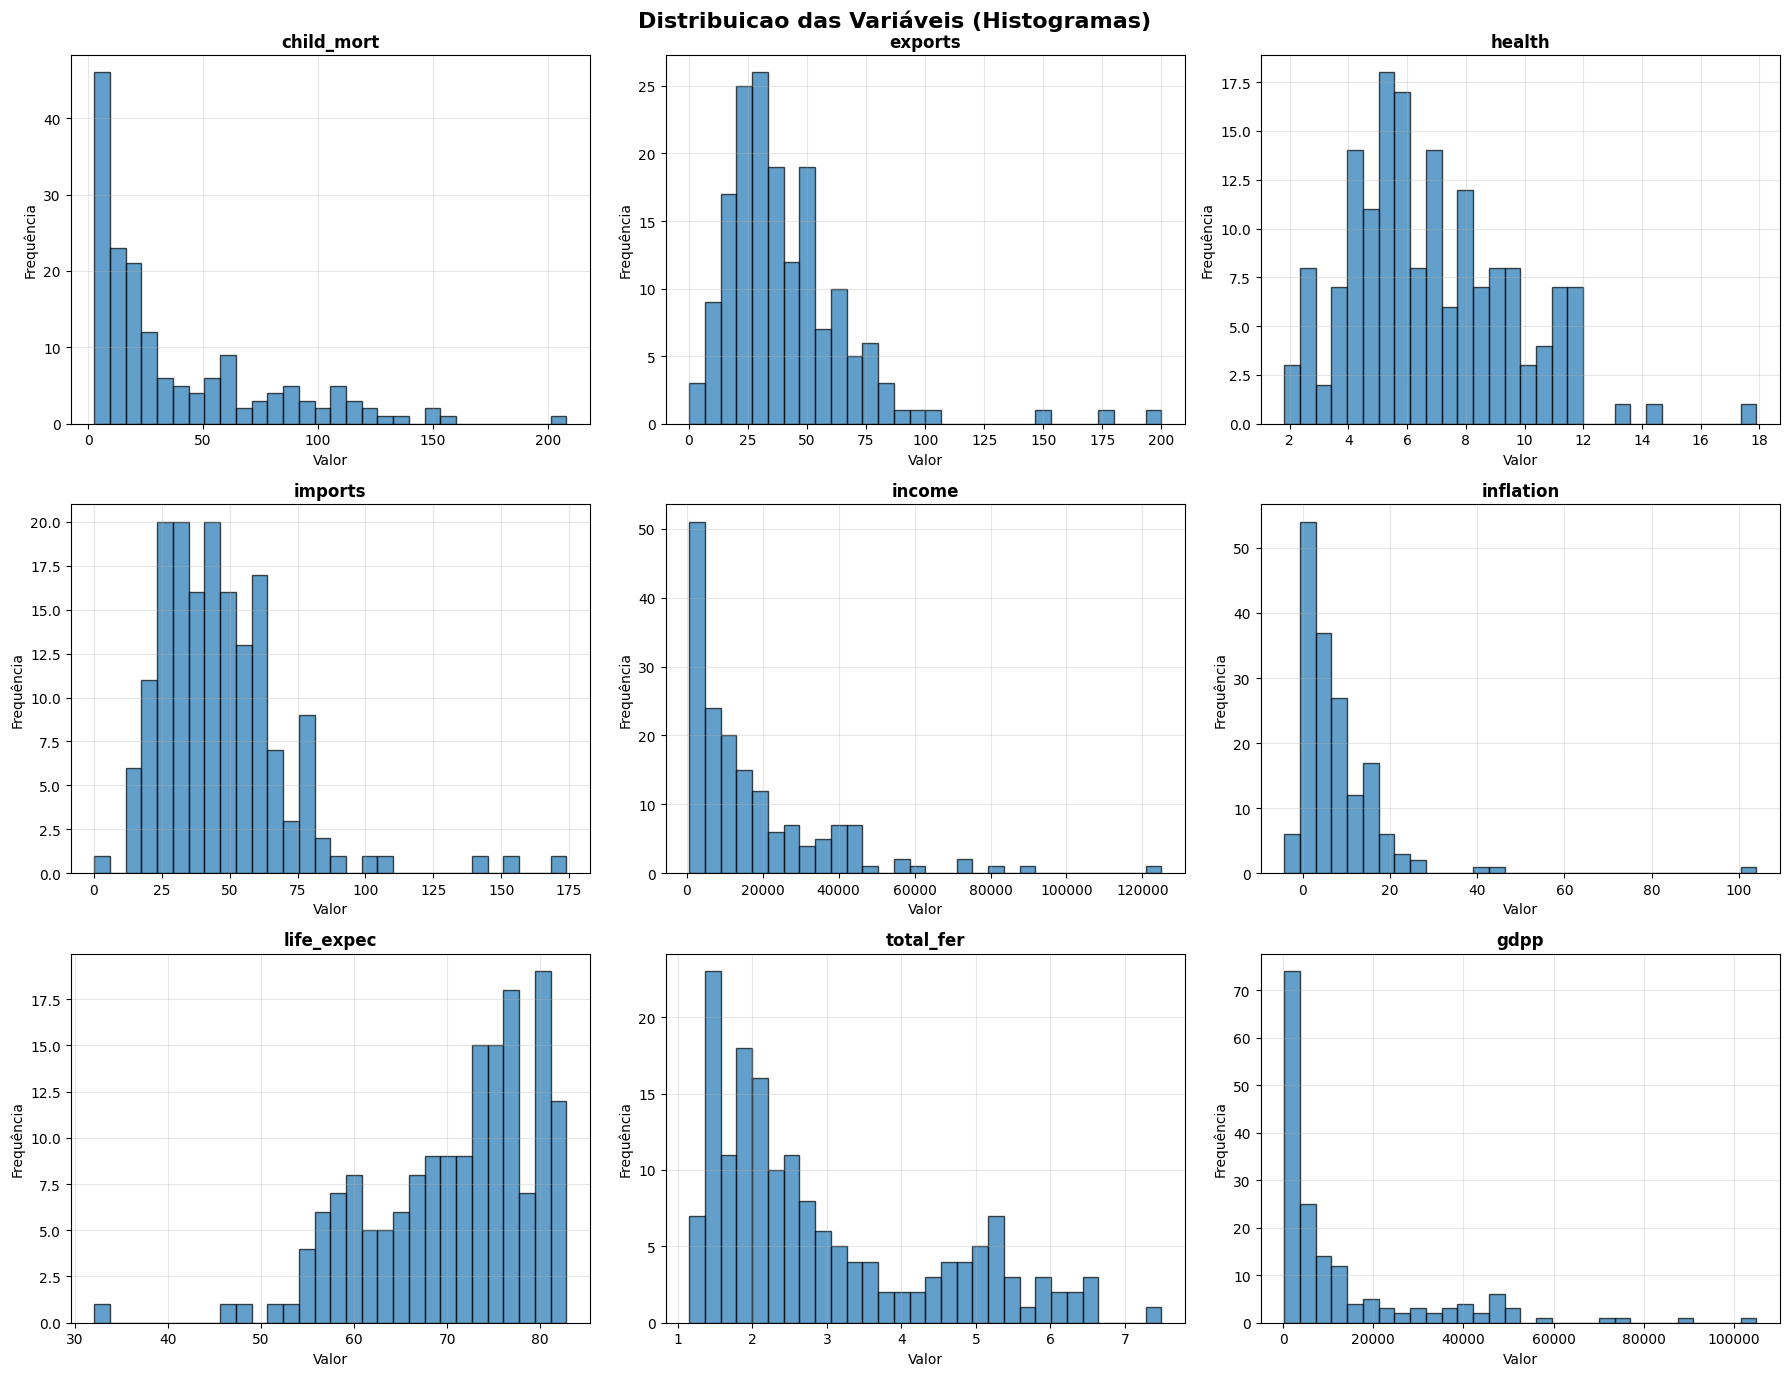

In [ ]:
fig2, axes = plt.subplots(3, 3, figsize=(18, 14))
fig2.suptitle('Distribuicao das Variáveis (Histogramas)', fontsize=16, fontweight='bold')

for idx, col in enumerate(num_cols):
    ax = axes[idx // 3, idx % 3]
    ax.hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    ax.set_title(f'{col}', fontweight='bold')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frequência')
    ax.grid(True, alpha=0.3)

plt.tight_layout()

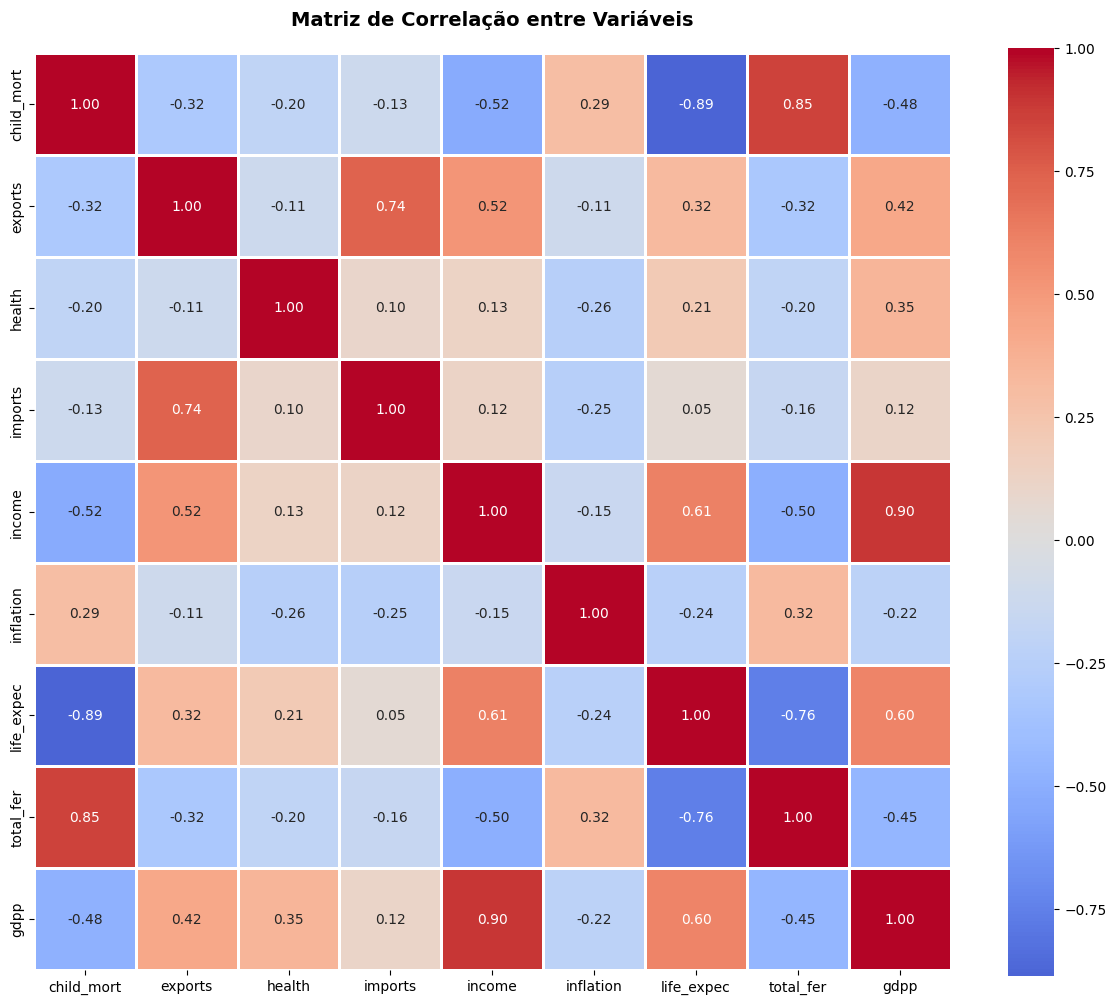

In [9]:
fig3, ax = plt.subplots(figsize=(12, 10))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, ax=ax)
ax.set_title('Matriz de Correlação entre Variáveis', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()

### Pré-processamento dos dados

##### Verificação de valores ausentes

In [10]:
df_processed = df.copy()

# Verificação de valores ausentes
missing_values = df_processed.isnull().sum()

if missing_values.sum() > 0:
    print("Existem valores ausentes no dataset.")
    print(f"Total de valores ausentes: {missing_values.sum()}")
    print("\nVariáveis com valores ausentes:")
    print(missing_values[missing_values > 0])
else:
    print("Não existem valores ausentes no dataset.")

Não existem valores ausentes no dataset.


##### Separação de features e países

In [11]:
X = df_processed[num_cols].values
y = df_processed['country'].values

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=num_cols)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### K-means

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [21]:
kmeans.cluster_centers_

array([[-0.39328196, -0.03058375, -0.20617903,  0.01956247, -0.25093021,
        -0.00578315,  0.22676244, -0.40257862, -0.35583225],
       [-0.82744866,  0.64507985,  0.72741122,  0.19063895,  1.48424268,
        -0.48492064,  1.07957853, -0.79187687,  1.61599536],
       [ 1.41356446, -0.45761494, -0.18789794, -0.18989721, -0.70783863,
         0.39898875, -1.29703104,  1.40287396, -0.61276131]])

In [32]:
print(f"\nClusters formados:")
for i in range(3):
    count = np.sum(kmeans_labels == i)
    print(f"  Cluster {i}: {count} paises ({count/len(df)*100:.1f}%)")


Clusters formados:
  Cluster 0: 86 paises (51.5%)
  Cluster 1: 36 paises (21.6%)
  Cluster 2: 45 paises (26.9%)


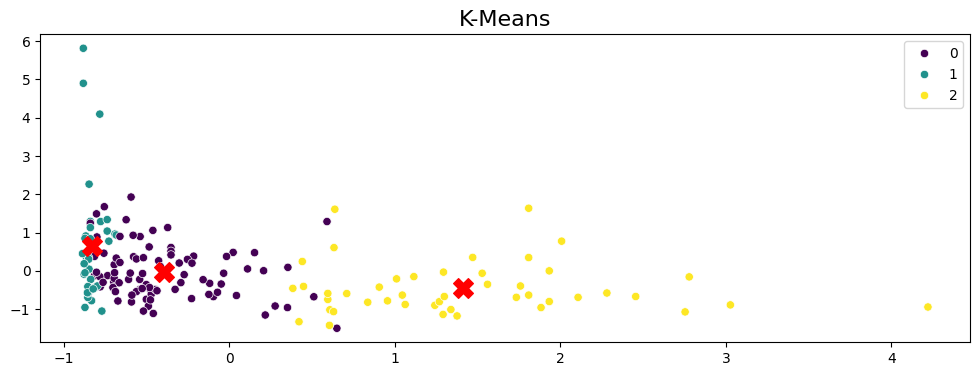

In [30]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.scatterplot(
    x=X_scaled[:, 0], 
    y=X_scaled[:, 1], 
    hue=kmeans_labels, 
    palette='viridis', 
    ax=ax
)

ax.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker='X',
    s=200,
    color='red'
)

ax.set_title('K-Means', fontsize=16)
plt.show()

#### Interpretação dos clusters K-Means

In [110]:
def cluster_countries(cluster_data):
    print(f"\nNumero de paises: {len(cluster_data)}")
    print(f"\nPaises neste cluster:")
    countries_list = cluster_data['country'].tolist()
    for i in range(0, len(countries_list), 15):
        print("  " + ", ".join(countries_list[i:i+15]))

def dimension_distribution(cluster_data):
    stats_df = cluster_data[num_cols].describe().loc[['mean', '50%', 'std']]
    print(stats_df.to_string())

def main_characteristics(cluster_data, cluster_title):
    print(f"\nCARACTERISTICAS PRINCIPAIS {cluster_title}:")
    means = cluster_data[num_cols].mean()
    
    print(f"  - Mortalidade Infantil: {means['child_mort']:.1f} (por 1000)")
    print(f"  - Expectativa de Vida: {means['life_expec']:.1f} anos")
    print(f"  - Renda per capita: ${means['income']:.0f}")
    print(f"  - GDPP: ${means['gdpp']:.0f}")
    print(f"  - Gastos com Saude: {means['health']:.1f}% do PIB")
    print(f"  - Inflacao: {means['inflation']:.1f}%")
    print(f"  - Taxa de Fertilidade: {means['total_fer']:.2f}")

def representative_country(cluster_data, cluster_id):
    print(f"\nPAIS REPRESENTANTE DO CLUSTER {cluster_id}:")
    print("-" * 80)
    cluster_mask = kmeans_labels == cluster_id
    
    cluster_scaled_data = X_scaled[cluster_mask]
    centroid = kmeans.cluster_centers_[cluster_id]
    distances = cdist(cluster_scaled_data, [centroid], metric='euclidean').flatten()
    
    closest_idx = np.argmin(distances)
    representative_country = cluster_data.iloc[closest_idx]['country']
    
    print(f"\nPais Representante: {representative_country}")
    print(f"Distancia ao centroide: {distances[closest_idx]:.4f}")

In [78]:
def analyze_cluster(cluster_id):
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id}")
    print(f"{'='*80}")
    
    cluster_mask = kmeans_labels == cluster_id
    cluster_data = df[cluster_mask]
    
    cluster_countries(cluster_data)
    dimension_distribution(cluster_data)
    main_characteristics(cluster_data)
    representative_country(cluster_data, cluster_id)
    
    print(f"\nJUSTIFICATIVA:")
    print(f"  {representative_country} e o pais mais proximo do centroide do cluster,")
    print(f"  ou seja, suas caracteristicas (mortalidade, renda, expectativa de vida,")
    print(f"  etc.) sao as mais representativas da media do grupo.")
    
    print(f"\nDados de {representative_country}:")
    rep_data = cluster_data[cluster_data['country'] == representative_country][num_cols].iloc[0]
    for col in num_cols:
        print(f"  {col:15s}: {rep_data[col]:>8.2f}")

In [88]:
cluster_zero_mask = kmeans_labels == 0
cluster_zero_data = df[cluster_zero_mask]

cluster_one_mask = kmeans_labels == 1
cluster_one_data = df[cluster_one_mask]

cluster_two_mask = kmeans_labels == 2
cluster_two_data = df[cluster_two_mask]

In [105]:
print(f"\n{'='*20}")
print(f"CLUSTER 0")
print(f"{'='*20}")
cluster_countries(cluster_zero_data)

print(f"\n{'='*20}")
print(f"CLUSTER 1")
print(f"{'='*20}")
cluster_countries(cluster_one_data)

print(f"\n{'='*20}")
print(f"CLUSTER 2")
print(f"{'='*20}")
cluster_countries(cluster_two_data)



CLUSTER 0

Numero de paises: 86

Paises neste cluster:
  Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, Bahamas, Bangladesh, Barbados, Belarus, Belize, Bhutan, Bolivia, Bosnia and Herzegovina, Botswana
  Brazil, Bulgaria, Cambodia, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Fiji
  Georgia, Grenada, Guatemala, Guyana, Hungary, India, Indonesia, Iran, Iraq, Jamaica, Jordan, Kazakhstan, Kyrgyz Republic, Latvia, Lebanon
  Libya, Lithuania, Macedonia, FYR, Malaysia, Maldives, Mauritius, Micronesia, Fed. Sts., Moldova, Mongolia, Montenegro, Morocco, Myanmar, Nepal, Oman, Panama
  Paraguay, Peru, Philippines, Poland, Romania, Russia, Samoa, Saudi Arabia, Serbia, Seychelles, Solomon Islands, Sri Lanka, St. Vincent and the Grenadines, Suriname, Tajikistan
  Thailand, Tonga, Tunisia, Turkey, Turkmenistan, Ukraine, Uruguay, Uzbekistan, Vanuatu, Venezuela, Vietnam

CLUSTER 1

Numero de paises: 36

Pais

##### Distribuição de dimensões dos Clusters

In [106]:
print(f"\n{'='*10}")
print(f"CLUSTER 0")
print(f"{'='*10}")
dimension_distribution(cluster_zero_data)

print(f"\n{'='*10}")
print(f"CLUSTER 1")
print(f"{'='*10}")
dimension_distribution(cluster_one_data)

print(f"\n{'='*10}")
print(f"CLUSTER 2")
print(f"{'='*10}")
dimension_distribution(cluster_two_data)



CLUSTER 0
      child_mort    exports    health    imports        income  inflation  life_expec  total_fer         gdpp
mean   22.456977  40.273128  6.251047  47.362394  12321.744186   7.720884   72.566279   2.340349  6461.767442
50%    18.700000  37.650000  5.990000  48.650000  10450.000000   5.935000   73.450000   2.255000  4670.000000
std    14.077521  18.807700  2.166355  19.922847   8084.081117   7.818171    4.304898   0.732649  4966.642378

CLUSTER 1
      child_mort    exports    health    imports        income  inflation  life_expec  total_fer          gdpp
mean    5.000000  58.738889  8.807778  51.491667  45672.222222   2.671250   80.127778   1.752778  42494.444444
50%     4.200000  50.350000  9.445000  39.050000  40550.000000   1.190000   80.350000   1.815000  41200.000000
std     2.188933  41.930782  3.178015  36.843998  20852.017526   4.077719    1.815742   0.373054  18991.079777

CLUSTER 2
      child_mort    exports    health    imports       income  inflation  life_expe

##### - Características de cada cluster (pela média)

In [107]:
main_characteristics(cluster_zero_data, "CLUSTER 0")
main_characteristics(cluster_one_data, "CLUSTER 1")
main_characteristics(cluster_two_data, "CLUSTER 2")


CARACTERISTICAS PRINCIPAIS CLUSTER 0:
  - Mortalidade Infantil: 22.5 (por 1000)
  - Expectativa de Vida: 72.6 anos
  - Renda per capita: $12322
  - GDPP: $6462
  - Gastos com Saude: 6.3% do PIB
  - Inflacao: 7.7%
  - Taxa de Fertilidade: 2.34

CARACTERISTICAS PRINCIPAIS CLUSTER 1:
  - Mortalidade Infantil: 5.0 (por 1000)
  - Expectativa de Vida: 80.1 anos
  - Renda per capita: $45672
  - GDPP: $42494
  - Gastos com Saude: 8.8% do PIB
  - Inflacao: 2.7%
  - Taxa de Fertilidade: 1.75

CARACTERISTICAS PRINCIPAIS CLUSTER 2:
  - Mortalidade Infantil: 95.1 (por 1000)
  - Expectativa de Vida: 59.1 anos
  - Renda per capita: $3540
  - GDPP: $1767
  - Gastos com Saude: 6.3% do PIB
  - Inflacao: 12.0%
  - Taxa de Fertilidade: 5.07


#### País representativo de cada cluster

In [111]:
representative_country(cluster_zero_data, 0)
representative_country(cluster_one_data, 1)
representative_country(cluster_two_data, 2)


PAIS REPRESENTANTE DO CLUSTER 0:
--------------------------------------------------------------------------------

Pais Representante: Suriname
Distancia ao centroide: 0.7198

PAIS REPRESENTANTE DO CLUSTER 1:
--------------------------------------------------------------------------------

Pais Representante: Iceland
Distancia ao centroide: 0.7318

PAIS REPRESENTANTE DO CLUSTER 2:
--------------------------------------------------------------------------------

Pais Representante: Guinea
Distancia ao centroide: 0.7704


In [115]:
print(f"\nJUSTIFICATIVA:")
print(f"Os países representantes são os que possuem as características mais próximas da média do grupo, ou seja, suas características (mortalidade, renda, expectativa de vida, etc.) são as mais representativas da média do grupo.")


JUSTIFICATIVA:
Os países representantes são os que possuem as características mais próximas da média do grupo, ou seja, suas características (mortalidade, renda, expectativa de vida, etc.) são as mais representativas da média do grupo.


### Visualização K-Means

Distribuição das features por cluster

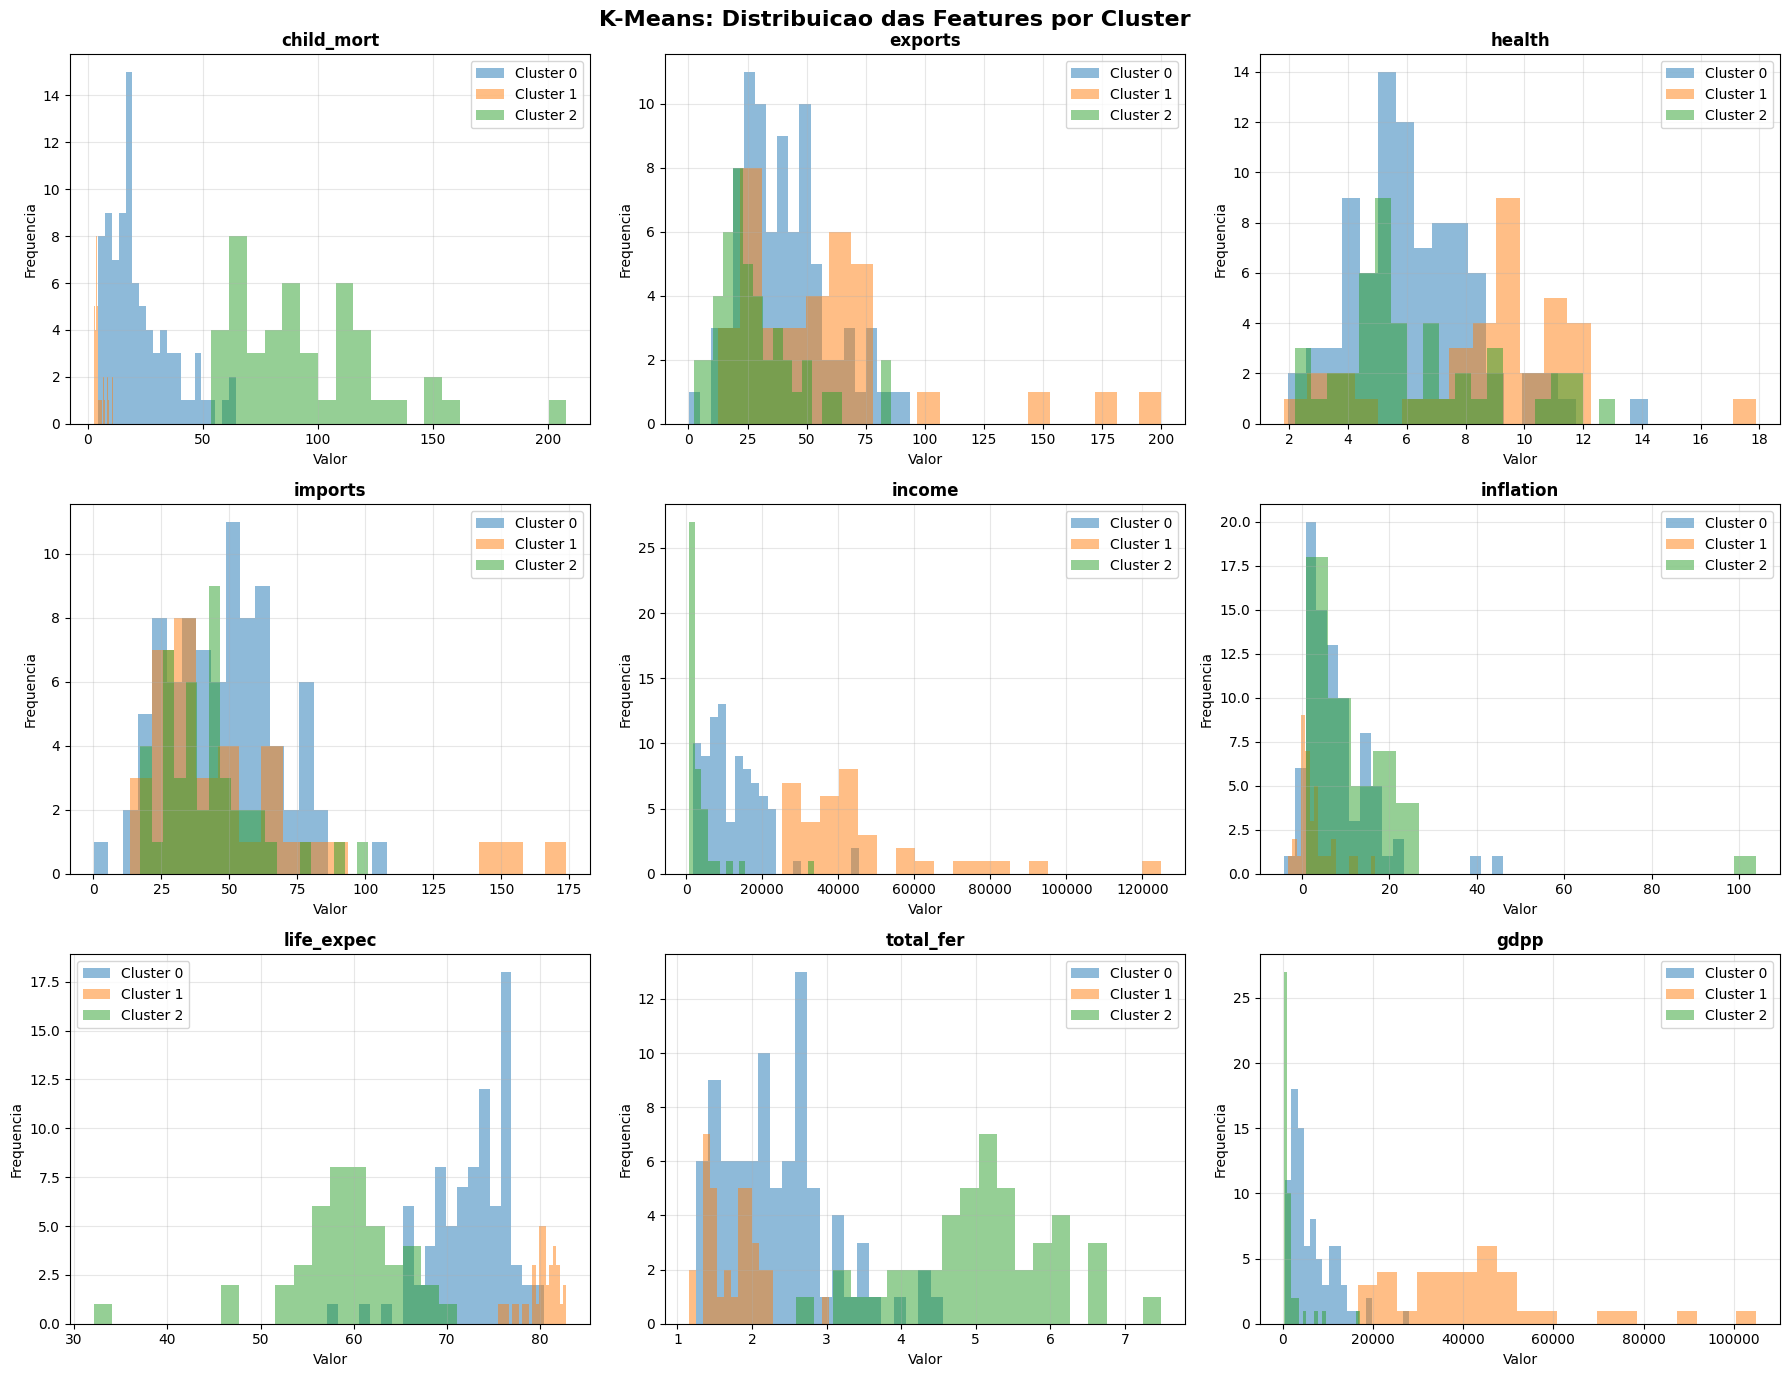

In [117]:
fig1, axes = plt.subplots(3, 3, figsize=(18, 14))
fig1.suptitle('K-Means: Distribuicao das Features por Cluster', fontsize=16, fontweight='bold')

for idx, col in enumerate(num_cols):
    ax = axes[idx // 3, idx % 3]
    
    for cluster_id in range(3):
        cluster_mask = kmeans_labels == cluster_id
        cluster_data = df[cluster_mask][col]
        ax.hist(cluster_data, alpha=0.5, label=f'Cluster {cluster_id}', bins=20)
    
    ax.set_title(f'{col}', fontweight='bold')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frequencia')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()

Boxplots comparativos

/var/folders/_z/2mdksj291s782py9yt8kqq1r0000gn/T/ipykernel_5277/3519394945.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=[f'C{i}' for i in range(3)])
/var/folders/_z/2mdksj291s782py9yt8kqq1r0000gn/T/ipykernel_5277/3519394945.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=[f'C{i}' for i in range(3)])
/var/folders/_z/2mdksj291s782py9yt8kqq1r0000gn/T/ipykernel_5277/3519394945.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=[f'C{i}' for i in range(3)])
/var/folders/_z/2mdksj291s782py9yt8kqq1r0000gn

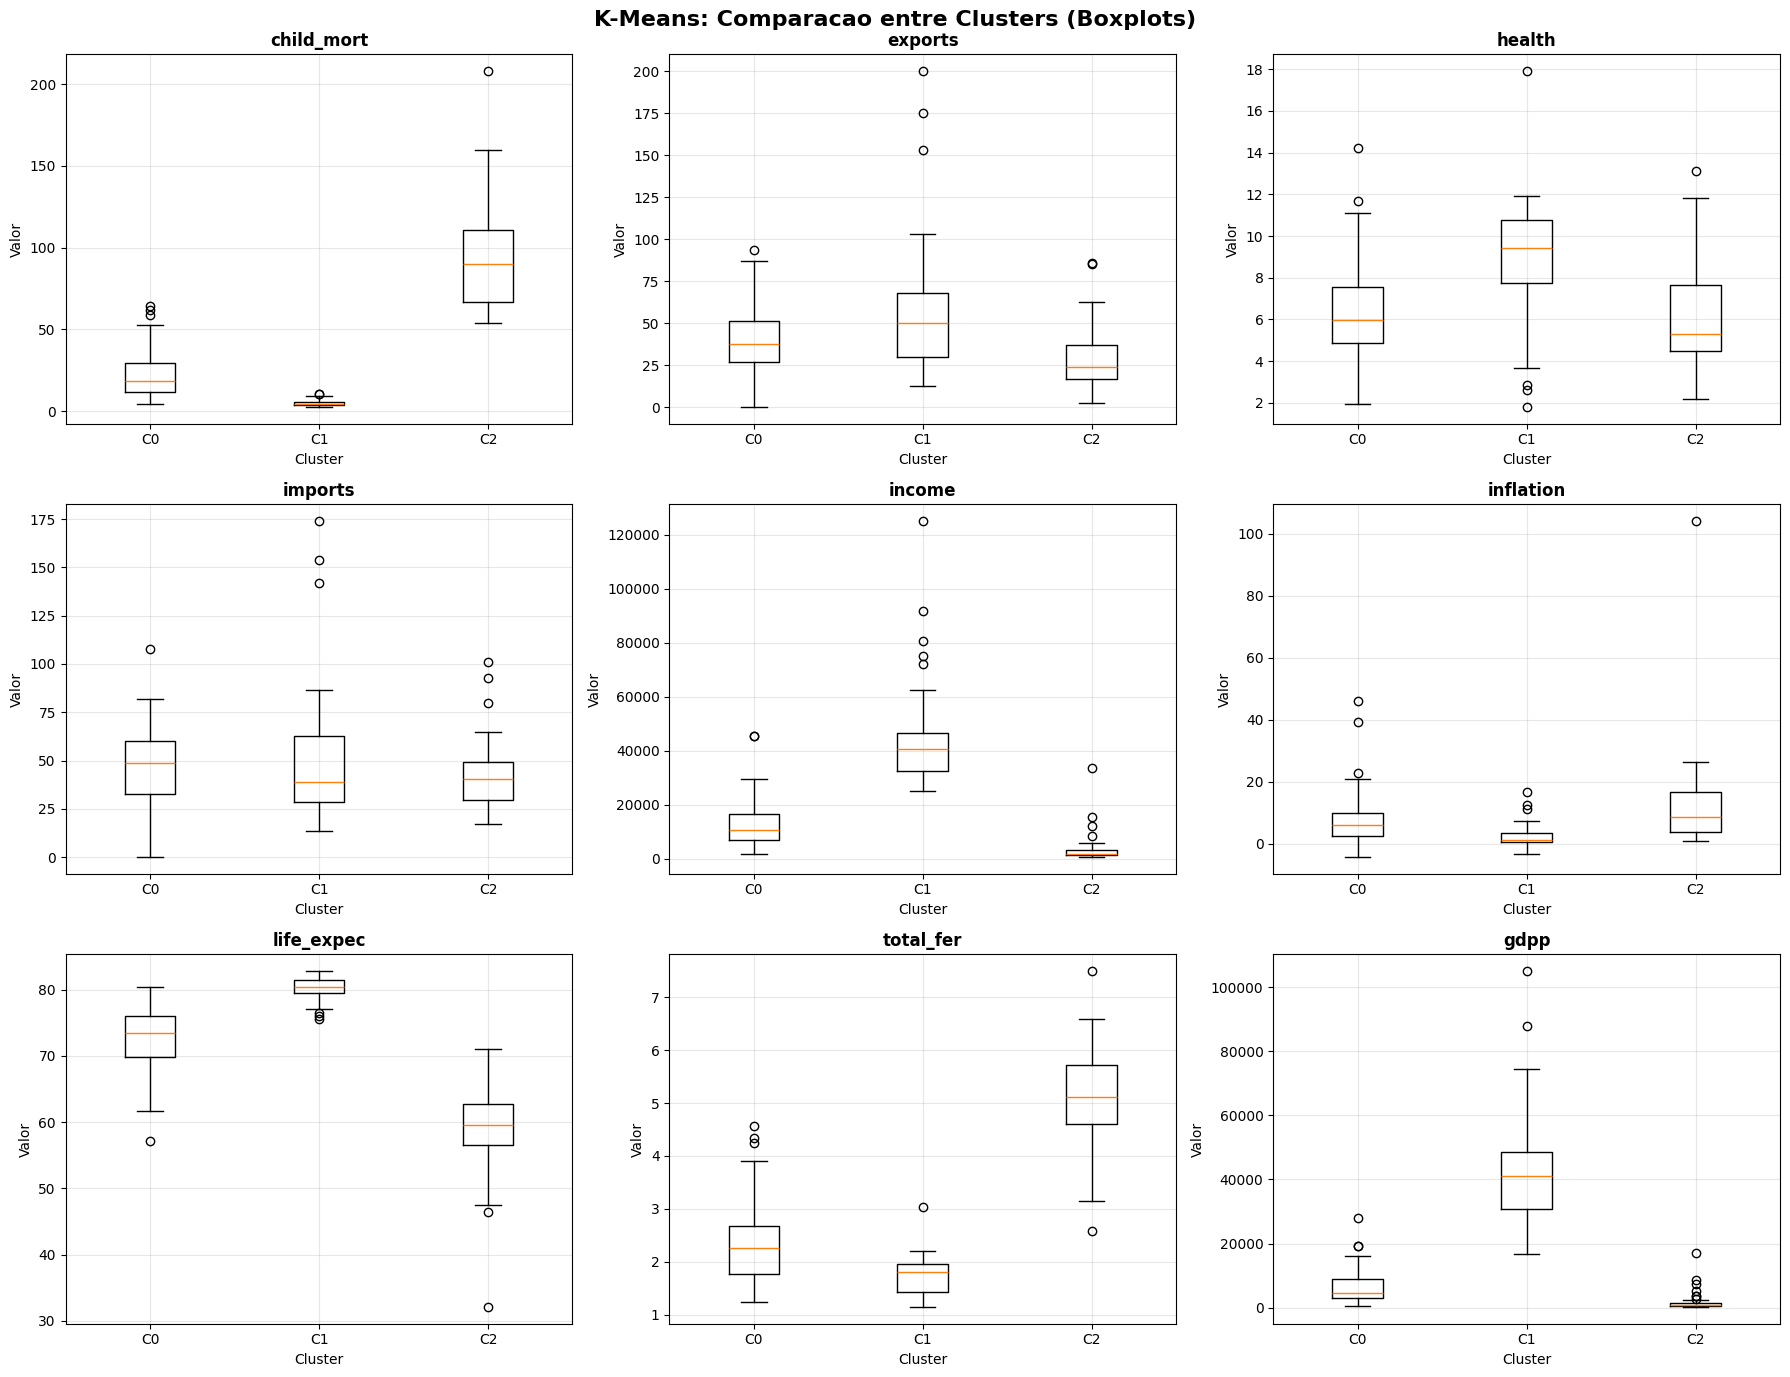

In [119]:
fig2, axes = plt.subplots(3, 3, figsize=(18, 14))
fig2.suptitle('K-Means: Comparacao entre Clusters (Boxplots)', fontsize=16, fontweight='bold')

for idx, col in enumerate(num_cols):
    ax = axes[idx // 3, idx % 3]
    
    data_to_plot = [df[kmeans_labels == i][col].values for i in range(3)]
    bp = ax.boxplot(data_to_plot, labels=[f'C{i}' for i in range(3)])
    
    ax.set_title(f'{col}', fontweight='bold')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Valor')
    ax.grid(True, alpha=0.3)

plt.tight_layout()

#### Clusterização Hierárquica

##### Single linkage

In [36]:
hierarchical_single_linkage = AgglomerativeClustering(n_clusters=3, linkage='single', metric='euclidean')
hierarchical_single_linkage_labels = hierarchical_single_linkage.fit_predict(X_scaled)

print(f"\nClusters formados:")
for i in range(3):
    count = np.sum(hierarchical_single_linkage_labels == i)
    print(f"  Cluster {i}: {count} paises ({count/len(df)*100:.1f}%)")


Clusters formados:
  Cluster 0: 165 paises (98.8%)
  Cluster 1: 1 paises (0.6%)
  Cluster 2: 1 paises (0.6%)


##### Complete linkage

In [37]:
hierarchical_complete_linkage = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='euclidean')
hierarchical_complete_linkage_labels = hierarchical_complete_linkage.fit_predict(X_scaled)

print(f"\nClusters formados:")
for i in range(3):
    count = np.sum(hierarchical_complete_linkage_labels == i)
    print(f"  Cluster {i}: {count} paises ({count/len(df)*100:.1f}%)")


Clusters formados:
  Cluster 0: 55 paises (32.9%)
  Cluster 1: 109 paises (65.3%)
  Cluster 2: 3 paises (1.8%)


In [42]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [48]:
single_linkage = hierarchy.linkage(X_scaled, method='single', metric='euclidean')
complete_linkage = hierarchy.linkage(X_scaled, method='complete', metric='euclidean')


In [62]:
def show_dendrogram(linkage, title):
    f, ax = plt.subplots(1, 1, figsize=(24, 12))

    hierarchy.dendrogram(
        linkage,
        labels=df['country'].values,
        distance_sort=True,
        above_threshold_color='red',
        ax=ax,
    )
    ax.set_title(title)

    sns.despine()
    plt.show()

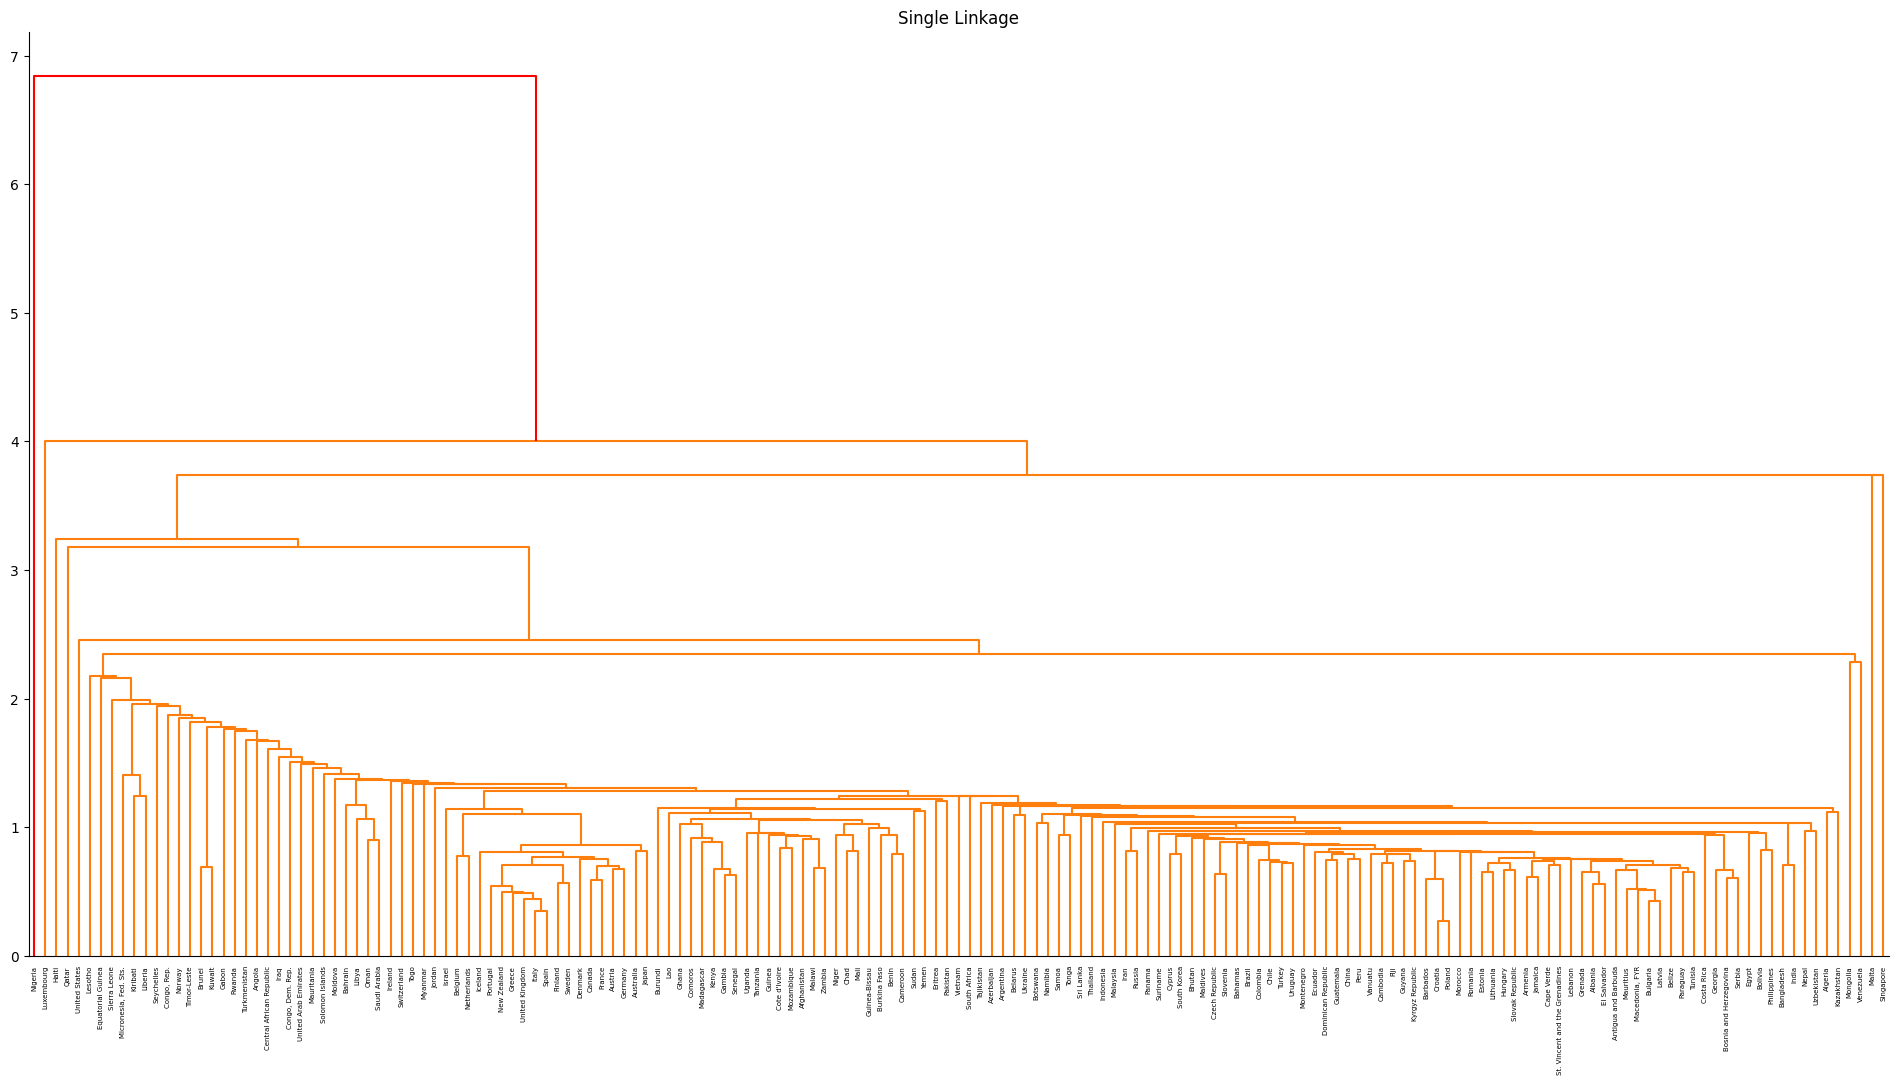

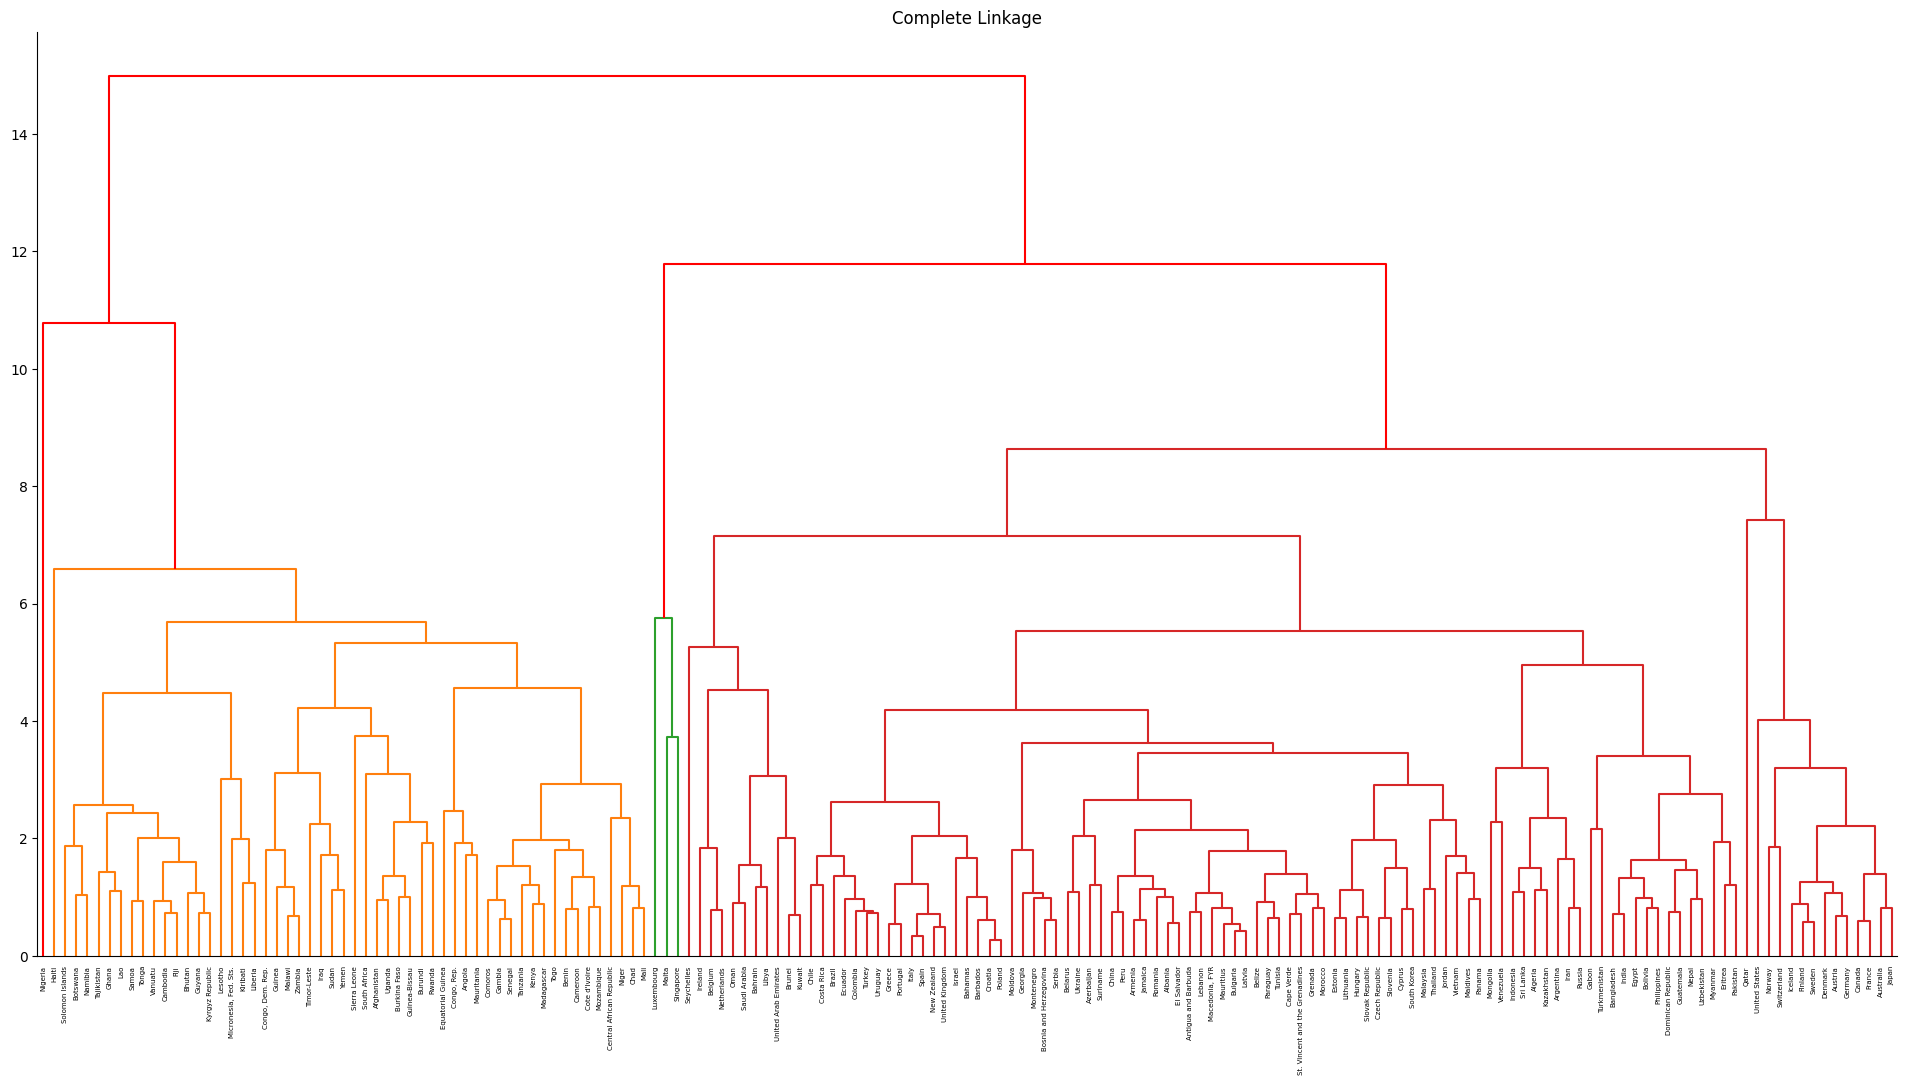

In [63]:
show_dendrogram(single_linkage, 'Single Linkage')
show_dendrogram(complete_linkage, 'Complete Linkage')


### Etapas do algoritmo K-médias até a sua convergência

1. Na primeira etapa, ocorre a definação do número de clusters k.
2. É selecionado aleatoriamente k pontos iniciais do dataset para serem os centróides.
3. Para cada dado no conjunto é calculado a distância do ponto para cada centróide e atribui o ponto ao cluster cujo centróide é o mais próximo.
4. Após todos os pontos serem atribuídos os centróides são recalculados (um novo centróide é a média dos pontos dentro de cada cluster)
5. Se os centróides não mudam significativamente em relação à interação anterior ou se for atingida o número máximo de iterações, o algoritmo para. Caso contrário, continua a partir da etapa 3.
	•	Se os centróides não mudarem significativamente em relação à iteração anterior (ou atingir número máximo de iterações), parar.
	•	Caso contrário, voltar ao passo 3.

### O algoritmo K-médias é sensível a outliers nos dados

O K-means usa média aritmética para recalcular cada centróide.

Outliers (valores muito extremos) puxam a média, fazendo com que:
	•	centróides se desloquem para regiões onde não existe densidade real de dados
	•	o cluster seja definido incorretamente
	•	pontos normais sejam classificados de forma errada

Exemplo simples: média de [10, 12, 11, 500] → 133,25
O valor 500 “puxa” o centróide para longe do grupo real.

### Por quê o algoritmo de DBScan é mais robusto à presença de outliers?

DBSCAN não tenta encontrar centróides nem calcula médias.

Em vez disso, ele forma clusters com base em densidade de pontos:
	•	Pontos em regiões densas → pertencem a um cluster
	•	Pontos isolados (baixa densidade) → são marcados como outliers (ruído)

Assim:
	•	Outliers são ignorados naturalmente pelo algoritmo
	•	Eles não influenciam a forma dos clusters
	•	Não existe cálculo de centróide que possa ser distorcido

DBSCAN não tenta “forçar” um ponto extremo para dentro de um cluster → ele simplesmente o classifica como ruído.